## 1. Exploratory Data Analysis (EDA):
    Perform exploratory data analysis to understand the structure of the dataset.
    Check for missing values, outliers, inconsistencies in the data.

## 2: Data Visualization:
    Create visualizations such as histograms, box plots, or pair plots to visualize the distributions and relationships between features.
    Analyze any patterns or correlations observed in the data.

## 3: Data Preprocessing
    1. Check for missing values in the dataset and decide on a strategy for handling them.Implement the chosen strategy (e.g., imputation or removal) and  explain your reasoning.
    2. If there are categorical variables, apply encoding techniques like one-hot encoding to convert them into numerical format.
    3. Apply feature scaling techniques such as standardization or normalization to ensure that all features are on a similar scale. Handling the imbalance data.



In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,precision_score,roc_curve,recall_score,f1_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier,BaggingRegressor,RandomForestClassifier,RandomForestRegressor
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import StandardScaler,LabelEncoder
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')
from sklearn.tree import DecisionTreeClassifier

In [6]:
df=pd.read_csv('glass.csv')

In [7]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1.0


In [8]:
df.isnull().sum()

RI      785
Na      785
Mg      785
Al      785
Si      785
K       785
Ca      785
Ba      785
Fe      785
Type    785
dtype: int64

In [11]:
for col in df.columns:
    df.fillna({col:df[col].mean()},inplace=True)

In [12]:
df.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [13]:
df.duplicated().sum()

np.int64(785)

In [14]:
df.drop_duplicates(inplace=True)

In [15]:
df.duplicated().sum()

np.int64(0)

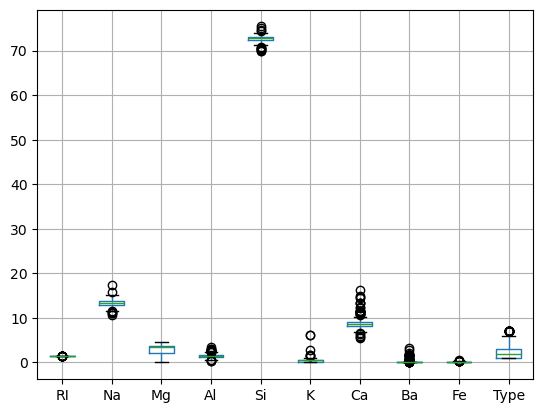

In [16]:
df.boxplot()
plt.show()

In [17]:
def outlier_capping(df,column):
    Q1=df[column].quantile(0.25)
    Q3=df[column].quantile(0.75)
    IQR=Q3-Q1
    Lower_Xstream=Q1-1.5*IQR
    Upper_Xstream=Q3+1.5*IQR
    df[column]=df[column].apply(lambda x:Lower_Xstream if x<Lower_Xstream else Upper_Xstream if x > Upper_Xstream else x)
for col in df.select_dtypes(['int','float']).columns:
    outlier_capping(df,col)

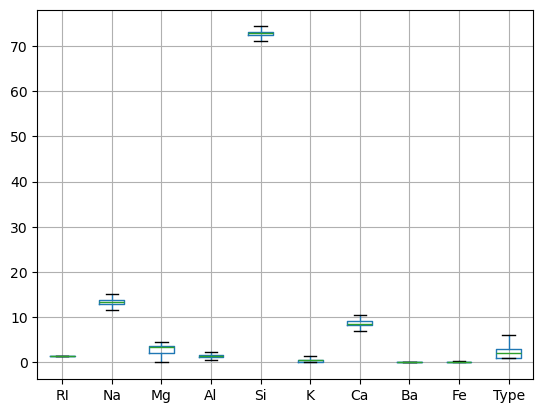

In [18]:
df.boxplot()
plt.show()

In [23]:
features=df.drop(columns='Type')
features.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0


In [24]:
target=df[['Type']]
target

,Type
0,1.000000
1,1.000000
2,1.000000
3,1.000000
4,1.000000
...,...
210,6.000000
211,6.000000
212,6.000000
213,6.000000


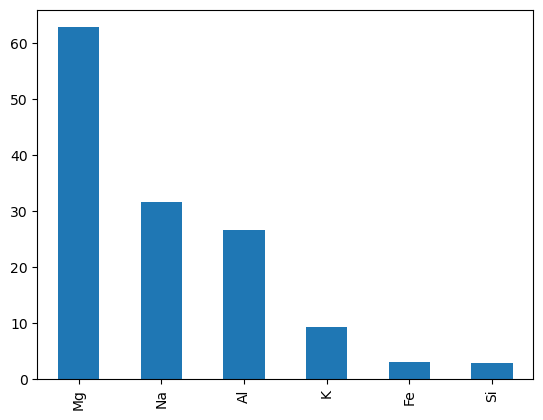

In [57]:
fcls=f_classif(features,target)
pd.Series(fcls[0],index=features.columns).sort_values(ascending=False).plot(kind='bar')
plt.show()

In [34]:
features.drop(columns=['Ca','RI','Ba'],inplace=True)
features

,Na,Mg,Al,Si,K,Fe
0,13.64000,4.490000,1.100000,71.780000,0.060000,0.000000
1,13.89000,3.600000,1.360000,72.730000,0.480000,0.000000
2,13.53000,3.550000,1.540000,72.990000,0.390000,0.000000
3,13.21000,3.690000,1.290000,72.610000,0.570000,0.000000
4,13.27000,3.620000,1.240000,73.080000,0.550000,0.000000
...,...,...,...,...,...,...
210,14.92000,0.000000,1.990000,73.060000,0.000000,0.000000
211,14.36000,0.000000,2.020000,73.420000,0.000000,0.000000
212,14.38000,0.000000,1.940000,73.610000,0.000000,0.000000
213,14.23000,0.000000,2.080000,73.360000,0.000000,0.000000


In [36]:
std=StandardScaler()
df1=pd.DataFrame(std.fit_transform(features),columns=features.columns)
df1.head()

,Na,Mg,Al,Si,K,Fe
0,0.323655,1.260169,-0.775960,-1.372712,-1.257226,-0.622769
1,0.663112,0.640792,-0.155325,0.086445,0.124235,-0.622769
2,0.174295,0.605996,0.274345,0.485793,-0.171792,-0.622769
3,-0.260210,0.703426,-0.322419,-0.097870,0.420263,-0.622769
4,-0.178740,0.654711,-0.441772,0.624029,0.354479,-0.622769


In [58]:
label=LabelEncoder()
df2=pd.DataFrame(label.fit_transform(target),columns=target.columns)
df2

,Type
0,0
1,0
2,0
3,0
4,0
...,...
209,5
210,5
211,5
212,5


## 4: Random Forest Model Implementation
    1. Divide the data into train and test split.
    2. Implement a Random Forest classifier using Python and a machine learning library like scikit-learn.
    3. Train the model on the train dataset. Evaluate the performance on test data using metrics like accuracy, precision, recall, and F1-score.

In [41]:
x_train,x_test,y_train,y_test=train_test_split(df1,df2,train_size=0.80,random_state=100)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(171, 6)
(43, 6)
(171, 1)
(43, 1)


In [59]:
random=RandomForestClassifier(n_estimators=100,max_depth=9,bootstrap=True)
random.fit(x_train,y_train)

RandomForestClassifier(max_depth=9)

In [60]:
y_pred=random.predict(x_test)
print("Accuracy:",accuracy_score(y_test,y_pred))
print("Precision:",precision_score(y_test,y_pred,average="weighted"))
print("Recall:",recall_score(y_test,y_pred,average="weighted"))
print("F1-Score:",f1_score(y_test,y_pred,average="weighted"))

Accuracy: 0.7674418604651163
Precision: 0.7968536251709987
Recall: 0.7674418604651163
F1-Score: 0.750364461120275


## 5: Bagging and Boosting Methods
    Apply the Bagging and Boosting methods and compare the results.

In [72]:
bagg=BaggingClassifier(estimator=DecisionTreeClassifier(),n_estimators=100,max_features=1,bootstrap=True,random_state=100,max_samples=0.9)
bagg.fit(x_train,y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), max_features=1,
                  max_samples=0.9, n_estimators=100, random_state=100)

In [73]:
y_pred=bagg.predict(x_test)
accuracy_score(y_test,y_pred)

0.6511627906976745

In [89]:
import xgboost as xgb

In [87]:
xg=xgb.XGBClassifier(n_estimators=100,learning_rate=0.5,min_child_weight=3,reg_alpha=5,reg_lambda=10,
                      subsample=0.9,max_depth=5,max_features=1,random_state=100)
xg.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.5, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_features=1, max_leaves=None, min_child_weight=3, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, ...)

In [88]:
y_pred=xg.predict(x_test)
accuracy_score(y_test,y_pred)

0.6511627906976745

## Additional Notes:
    1. Explain Bagging and Boosting methods. How is it different from each other.
    
               Both Bagging and Boosting methods contains multiple models and pass the features to the all models for training . In bagging it will shuffle the data across different models.While in boosting it will prepare a new data based on the errors occur in the previous model and pass it to thenext model.
               
    2. Explain how to handle imbalance in the data.
    
               Incase of imbalance in the data use methods like LogisticRegression and RandomForestClassifier which has inbuilt features to handle imbalance in the data.Use precision , f1_score or ROC curve fro better prediction of imbalanced data
               